<a href="https://colab.research.google.com/github/krishuynh2222/Predicting_E-commerce_Customer_Churn/blob/main/Predicting_Customer_Churn_in_E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, mean_squared_error, r2_score, mean_absolute_error
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
# Read the specific sheet from the Excel file
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')

#Data Processing/Cleaning

In [3]:
df.head(5) #show the first 5 rows

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df.shape #returns the number of rows/ columns

(5630, 20)

In [5]:
df.columns #returns a list of all column names

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [6]:
df.describe().T #returns the summary of data

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [7]:
#Handling missing data
df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [8]:
#check duplicate
df.duplicated().sum()

np.int64(0)

In [9]:
#display rows and columns
df.shape

(5630, 20)

In [10]:
for col in ['Tenure','WarehouseToHome','HourSpendOnApp',
            'OrderAmountHikeFromlastYear','CouponUsed',
            'OrderCount','DaySinceLastOrder']:
    df[col].fillna(df[col].median(), inplace=True)

In [11]:
# Drop CustomerID if it exists (non-predictive)
df_clean = df.drop('CustomerID', axis=1, errors='ignore').copy()
# Standardize categorical values
df_clean['PreferredLoginDevice'] = df_clean['PreferredLoginDevice'].replace({'Phone': 'Mobile Phone'})
df_clean['PreferedOrderCat'] = df_clean['PreferedOrderCat'].replace({'Mobile': 'Mobile Phone'})

In [12]:
df_clean.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Mobile Phone,1,12.0,CC,Male,3.0,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [13]:
# # Impute ALL numerical missing values with median in one go
# num_cols = df_clean.select_dtypes(include=[np.number]).columns
# for col in num_cols:
#     if df_clean[col].isnull().any():
#         df_clean[col] = df_clean[col].fillna(df_clean[col].median())

#EDA

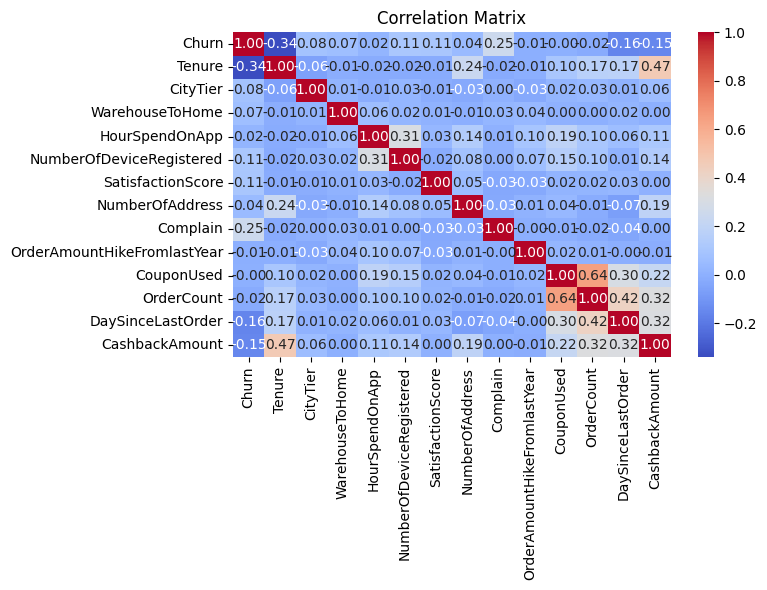

In [14]:
# Correlation Matrix
plt.figure(figsize=(8, 6))
numeric_df = df_clean.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

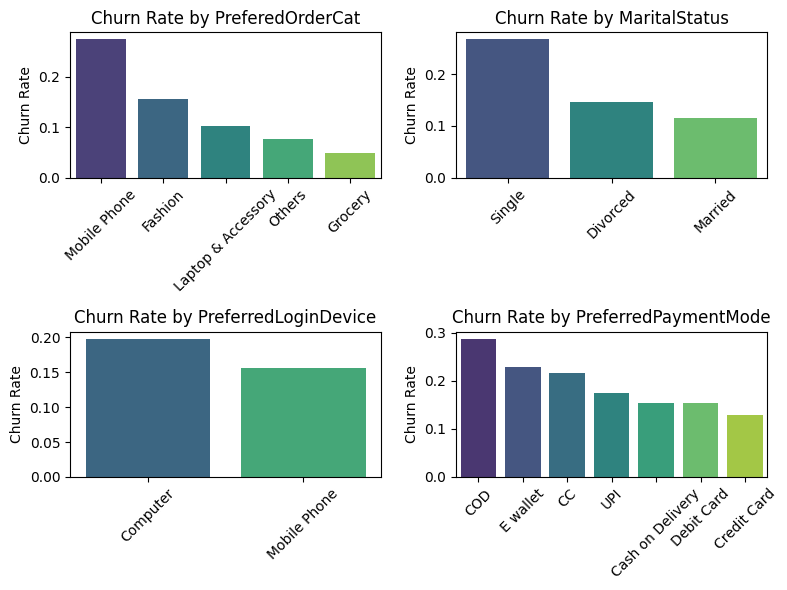

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

def plot_churn_rate(df, col, ax):
    churn_rate = df.groupby(col)['Churn'].mean().sort_values(ascending=False)
    sns.barplot(x=churn_rate.index, y=churn_rate.values, ax=ax, palette='viridis', order=churn_rate.index)
    ax.set_title(f'Churn Rate by {col}')
    ax.set_ylabel('Churn Rate')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)

plot_churn_rate(df_clean, 'PreferedOrderCat', axes[0, 0])
plot_churn_rate(df_clean, 'MaritalStatus', axes[0, 1])
plot_churn_rate(df_clean, 'PreferredLoginDevice', axes[1, 0])
plot_churn_rate(df_clean, 'PreferredPaymentMode', axes[1, 1])

plt.tight_layout()
plt.show()

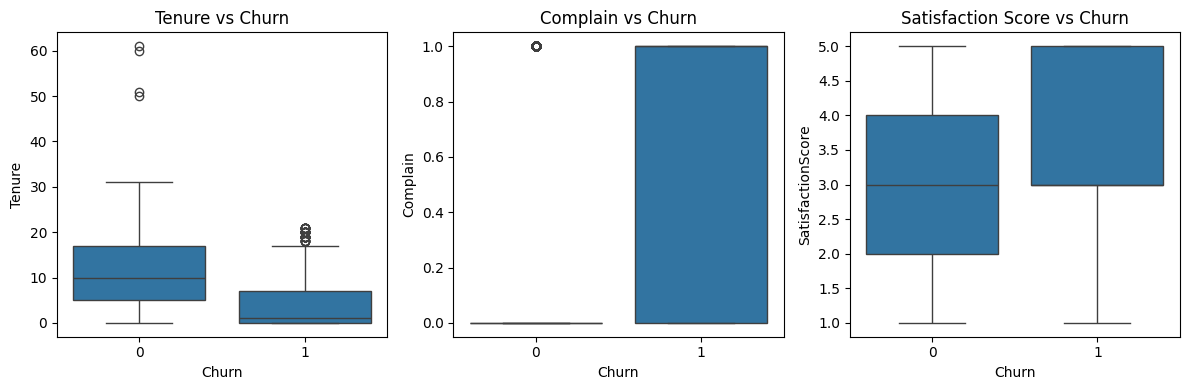

In [16]:
# Numerical Distributions vs Churn
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sns.boxplot(x='Churn', y='Tenure', data=df_clean, ax=axes[0])
axes[0].set_title('Tenure vs Churn')
sns.boxplot(x='Churn', y='Complain', data=df_clean, ax=axes[1])
axes[1].set_title('Complain vs Churn')
sns.boxplot(x='Churn', y='SatisfactionScore', data=df_clean, ax=axes[2])
axes[2].set_title('Satisfaction Score vs Churn')
plt.tight_layout()
plt.show()

#Train/Test Split

#### PCA Analysis

In [17]:
#PCA Analysis
df_pca_prep = pd.get_dummies(df_clean, drop_first=True)
X_pca = df_pca_prep.drop('Churn', axis=1)
y_pca = df_pca_prep['Churn']

In [18]:
X_pca.head()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,4.0,3,6.0,3.0,3,2,9,1,11.0,1.0,...,True,False,False,False,False,True,False,False,False,True
1,9.0,1,8.0,3.0,4,3,7,1,15.0,0.0,...,False,False,True,True,False,False,True,False,False,True
2,9.0,1,30.0,2.0,4,3,6,1,14.0,0.0,...,True,False,False,True,False,False,True,False,False,True
3,0.0,3,15.0,2.0,4,5,8,0,23.0,0.0,...,True,False,False,True,False,True,False,False,False,True
4,0.0,1,12.0,3.0,3,5,3,0,11.0,1.0,...,False,False,False,True,False,False,True,False,False,True


In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

In [20]:
# Apply PCA
pca = PCA()
pca.fit(X_scaled)

PCA()

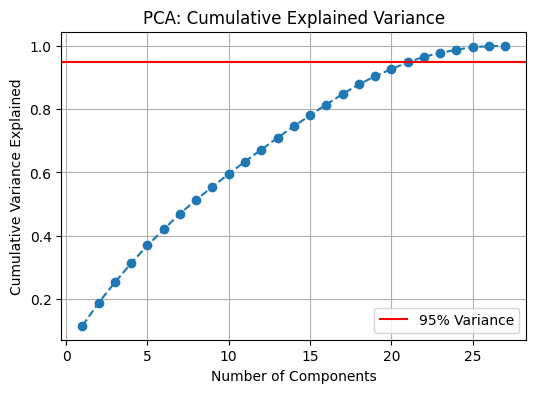

In [21]:
# Plot Cumulative Variance
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_),
         marker='o', linestyle='--')
plt.title('PCA: Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance')
plt.legend()
plt.grid(True)
plt.show()

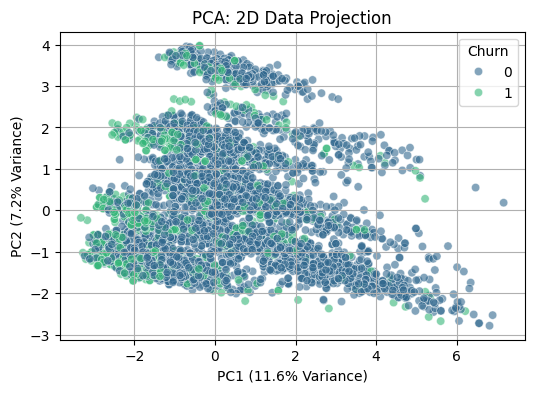

In [22]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=X_pca_2d, columns=['PC1', 'PC2'])
pca_df['Churn'] = y_pca.values

plt.figure(figsize=(6, 4))
sns.scatterplot(x='PC1', y='PC2', hue='Churn', data=pca_df, palette='viridis', alpha=0.6)
plt.title('PCA: 2D Data Projection')
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%} Variance)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%} Variance)')
plt.grid(True)

#### Random Forest

In [23]:
X = df_pca_prep.drop('Churn', axis=1)
y = df_pca_prep['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
# Train model
rf_regressor = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=15, class_weight='balanced')
rf_regressor.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=200,
                       random_state=42)

In [25]:
y_pred = rf_regressor.predict(X_test)
y_prob = rf_regressor.predict_proba(X_test)[:, 1]
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       936
           1       0.99      0.91      0.95       190

    accuracy                           0.98      1126
   macro avg       0.99      0.95      0.97      1126
weighted avg       0.98      0.98      0.98      1126



In [26]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 0.02
R2: 0.88
Mean Absolute Error: 0.02


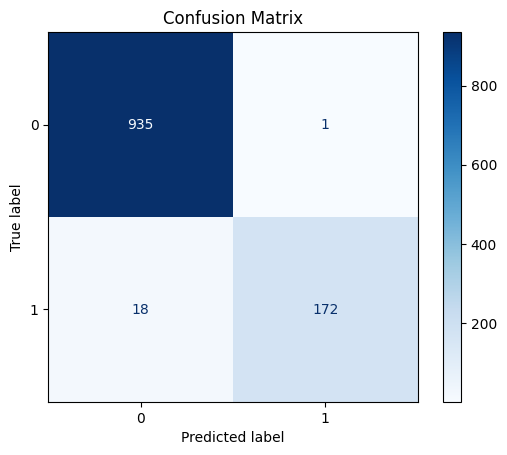

In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

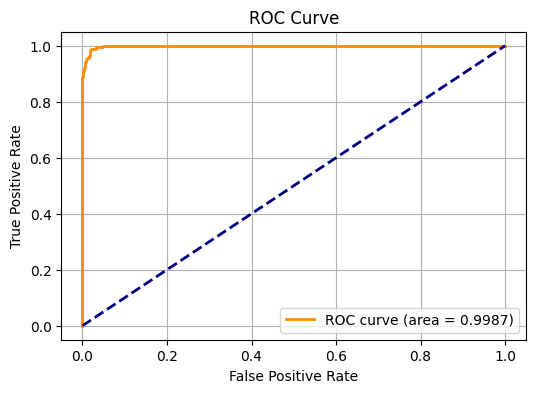

ROC-AUC Score: 0.9987


In [28]:
# ROC Curve & Score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"ROC-AUC Score: {roc_auc:.4f}")